# 全国新型コロナウイルスデータ



## jsonデータを読み込み

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.ticker as ticker
mpl.rcParams['font.family'] = 'AppleGothic'

pcr = pd.read_csv('./PCR.csv')
data = pd.read_csv('./COVID-19.csv')
data_pcr = pd.merge(pcr, data, right_on='確定日',left_on='年月日')
data.head()

,通し,厚労省NO,無症状病原体保有者,国内,チャーター便,年代,性別,確定日,発症日,受診都道府県,...,居住都道府県コード,更新日時,Field2,Field4,Field5,Field6,Field7,Field8,Field9,Field10
0,1,1,NaN,A-1,NaN,30,男性,1/15/2020,1/3/2020,神奈川県,...,14.0,4/21/2020 09:54,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,2,NaN,A-2,NaN,40,男性,1/24/2020,1/14/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,3,NaN,A-3,NaN,30,女性,1/25/2020,1/21/2020,東京都,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,NaN,A-4,NaN,40,男性,1/26/2020,1/23/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5,NaN,A-5,NaN,40,男性,1/28/2020,1/22/2020,愛知県,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11125 entries, 0 to 11124
Data columns (total 51 columns):
通し                  11125 non-null int64
厚労省NO               3427 non-null object
無症状病原体保有者           476 non-null object
国内                  302 non-null object
チャーター便              11 non-null object
年代                  11125 non-null object
性別                  11125 non-null object
確定日                 11125 non-null object
発症日                 6335 non-null object
受診都道府県              11125 non-null object
居住都道府県              11125 non-null object
居住管内                167 non-null object
居住市区町村              6595 non-null object
キー                  11125 non-null object
発表                  11125 non-null object
都道府県内症例番号           10336 non-null object
市町村内症例番号            2514 non-null object
ステータス               149 non-null object
備考                  1366 non-null object
ソース                 2466 non-null object
ソース2                8125 non-null object
ソース3                2305 non

## 症状別累計人数

In [3]:
total = int(data["累計"].iloc[-1])
d = int(data["死者合計"].dropna().iloc[-1])
di = int(data["退院数累計"].dropna().iloc[-1])
print(data["確定日"].iloc[-1],"現在データ")
print('全国の新型コロナウイルス感染者はトータル:',total,'死者合計:',d,'累計退院者数:',di)
print('死亡確率：{}%'.format((d/total)*100),'退院率：{}%'.format((di/total)*100))

4/20/2020 現在データ
全国の新型コロナウイルス感染者はトータル: 11125 死者合計: 223 累計退院者数: 1239
死亡確率：2.004494382022472% 退院率：11.137078651685393%


## 日別PCR検査数
厚生労働省の発表資料より

PCR検査数は毎日更新ではありません。

厚生労働省が更新するたびに多少過去の数値が変更されたりしています。

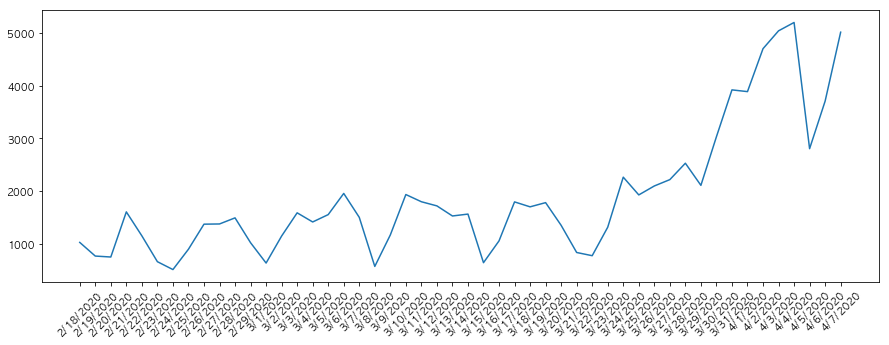

In [4]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['数'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

## 累計PCR検査数

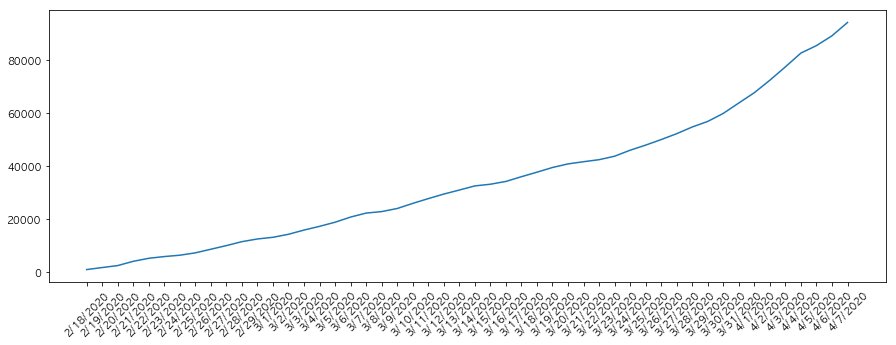

In [5]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(pcr['年月日'],pcr['PCR累計'])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=10);

In [6]:
data = data.convert_objects(convert_numeric=True)
data_day = data.dropna(subset=['累計'])
data_day.loc[:,['累計','確定日']]

/Users/tahara/.pyenv/versions/anaconda3-5.2.0/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.


,累計,確定日
0,1.0,1/15/2020
1,2.0,1/24/2020
2,3.0,1/25/2020
3,4.0,1/26/2020
6,7.0,1/28/2020
7,8.0,1/29/2020
13,14.0,1/30/2020
15,16.0,1/31/2020
18,19.0,2/1/2020
22,23.0,2/4/2020


## 日別感染者累計

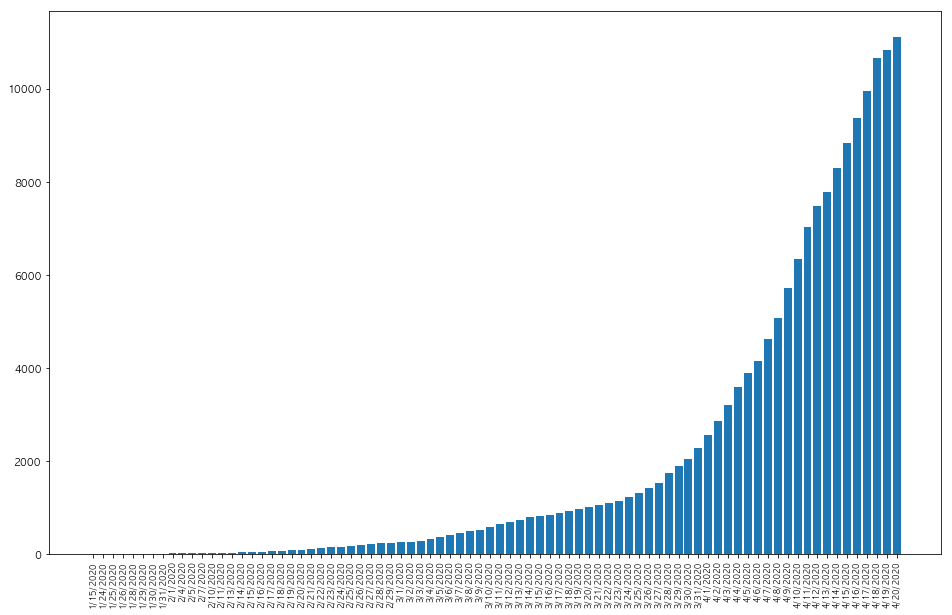

In [7]:
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(data_day['確定日'],data_day['累計'])

labels = ax.get_xticklabels()
plt.setp(labels, rotation=90, fontsize=8);


## 死亡者推移

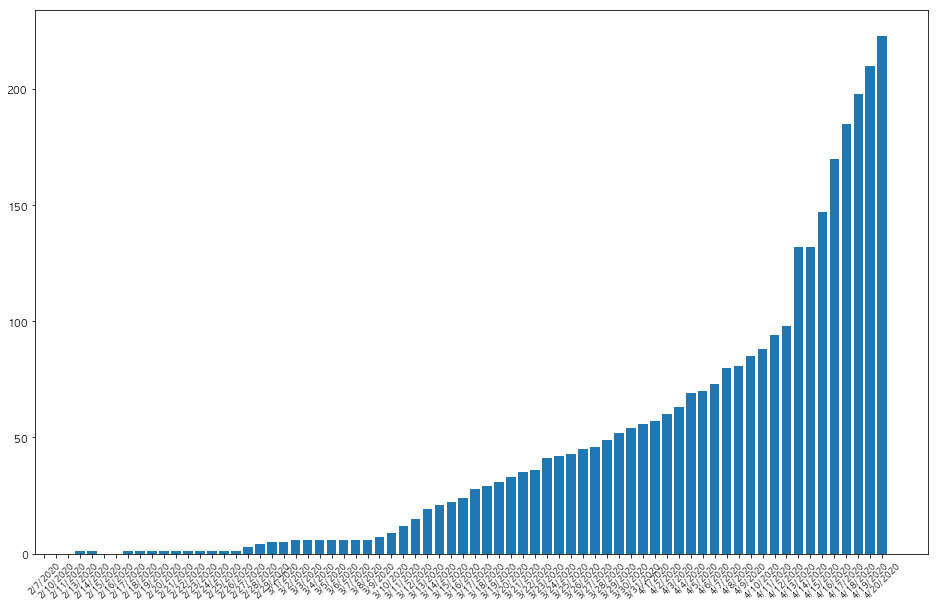

In [8]:
fig, ax = plt.subplots(figsize=(16,10))
ax.bar(data['確定日'],data["死者合計"])
labels = ax.get_xticklabels()
plt.setp(labels, rotation=45, fontsize=8);

## 年代別感染者数割合

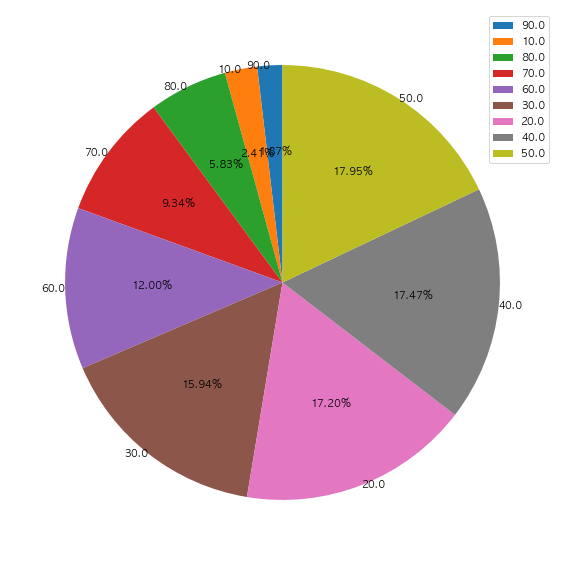

In [9]:
x = data['年代'].value_counts(ascending=True)
label_index = data['年代'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

## 性別感染者数割合

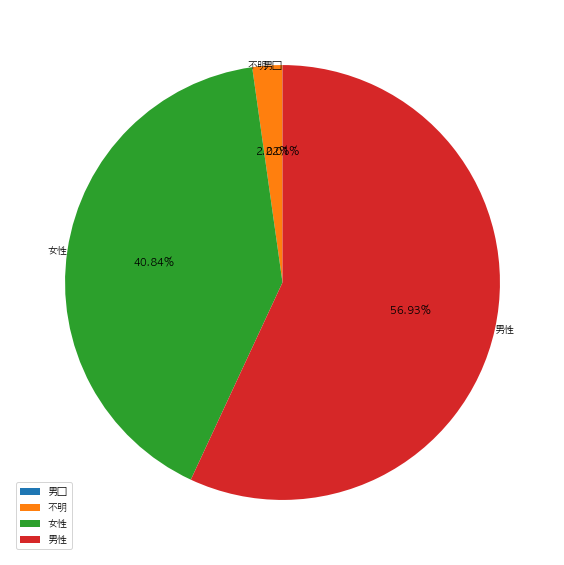

In [10]:
x = data['性別'].value_counts(ascending=True)
label_index = data['性別'].value_counts(ascending=True).index
plt.figure(figsize=(10,10))
plt.pie(x, labels= label_index, startangle=90, labeldistance=1,rotatelabels=False,autopct='%.2f%%')
plt.legend()
plt.show()

### 県別累計データ

In [11]:
grouped = data['人数'].groupby(data['居住都道府県'])
total_pref = grouped.sum()
total_pref = total_pref.sort_values(ascending=False) 
total_pref = pd.DataFrame(total_pref)
total_pref

,人数
居住都道府県,
東京都,3219
大阪府,1290
神奈川県,796
埼玉県,665
千葉県,654
福岡県,525
兵庫県,522
北海道,442
愛知県,416


In [12]:
location_data = pd.read_csv('./location.csv')
location_data.head()

,都道府県名,緯度,経度
0,北海道,43.06417,141.34694
1,青森県,40.82444,140.74000
2,岩手県,39.70361,141.15250
3,宮城県,38.26889,140.87194
4,秋田県,39.71861,140.10250


### locationデータと感染者数をマージ

In [13]:
pref_data = pd.merge(total_pref, location_data, left_on='居住都道府県', right_on='都道府県名', how='outer')
pref_data['人数'] = pref_data['人数'].fillna(0)
pref_data = pref_data.dropna(subset=['都道府県名'])
pref_data

,人数,都道府県名,緯度,経度
0,3219.0,東京都,35.68944,139.69167
1,1290.0,大阪府,34.68639,135.52000
2,796.0,神奈川県,35.44778,139.64250
3,665.0,埼玉県,35.85694,139.64889
4,654.0,千葉県,35.60472,140.12333
5,525.0,福岡県,33.60639,130.41806
6,522.0,兵庫県,34.69139,135.18306
7,442.0,北海道,43.06417,141.34694
8,416.0,愛知県,35.18028,136.90667
9,257.0,京都府,35.02139,135.75556


In [14]:
pref_data_dic = pref_data.to_dict(orient='index')
states = tuple(pref_data_dic.values())

## 県別感染者数Map表示
Map表示はGitHubではできませんので、次のリンクから確認ください。

[県別感染者数Map](https://haidoro.github.io/covid_japan/)

In [18]:
import folium
from folium.plugins import HeatMap

map_ = folium.Map(location=[35.684479, 139.747977], zoom_start=5)


# 円の大きさをわかりやすくするための重み
WEIGHT = 0.01


for state in states:
    folium.CircleMarker(
            [state['緯度'], state['経度']],
            radius=(state['人数'] + WEIGHT)*0.05,
            popup=state['都道府県名'],
            color='#3186cc',
            fill_color='#3186cc',
    ).add_to(map_)


map_.save('index.html')
map_
